In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
import time

from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_classification
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.feature_selection import SelectKBest, chi2

#Classifiers
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression

In [2]:
#load data
train_data = pd.read_csv('adult.data', skipinitialspace=True)
test_data = pd.read_csv('adult.test', skipinitialspace=True, skiprows=1, names= ['Age', 'State-gov', 'fnlwgt', 'Bachelors', 'edu-num', 'status', 'Occupation', 'Relationship', 'Race', 'Sex', 'capital-gain', 'capital-loss', 'hours', 'Country', '<=50K'])
train_data.columns = ['Age', 'State-gov', 'fnlwgt', 'Bachelors', 'edu-num', 'status', 'Occupation', 'Relationship', 'Race', 'Sex', 'capital-gain', 'capital-loss', 'hours', 'Country', '<=50K']

In [3]:
train_data.head()

,Age,State-gov,fnlwgt,Bachelors,edu-num,status,Occupation,Relationship,Race,Sex,capital-gain,capital-loss,hours,Country,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [4]:
test_data.head()

,Age,State-gov,fnlwgt,Bachelors,edu-num,status,Occupation,Relationship,Race,Sex,capital-gain,capital-loss,hours,Country,<=50K
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [5]:
#check for missing/invalid vlaues in the state-gov column/feature (IDA)
StateGov_values = train_data['State-gov'].value_counts(ascending=True, dropna=False)
print(f'Counts for State-gov column values:\n{StateGov_values}')

Counts for State-gov column values:
Never-worked            7
Without-pay            14
Federal-gov           960
Self-emp-inc         1116
State-gov            1297
?                    1836
Local-gov            2093
Self-emp-not-inc     2541
Private             22696
Name: State-gov, dtype: int64


In [6]:
#check for missing/invalid vlaues in the bachelores column/feature (IDA)
bach_values = train_data['Bachelors'].value_counts(ascending=True, dropna=False)
print(f'Counts for bachelors column values:\n{bach_values}')

Counts for bachelors column values:
Preschool          51
1st-4th           168
5th-6th           333
Doctorate         413
12th              433
9th               514
Prof-school       576
7th-8th           646
10th              933
Assoc-acdm       1067
11th             1175
Assoc-voc        1382
Masters          1723
Bachelors        5354
Some-college     7291
HS-grad         10501
Name: Bachelors, dtype: int64


In [7]:
#check for missing/invalid vlaues in the status column/feature (IDA)
status_values = train_data['status'].value_counts(ascending=True, dropna=False)
print(f'Counts for status column values:\n{status_values}')

Counts for status column values:
Married-AF-spouse           23
Married-spouse-absent      418
Widowed                    993
Separated                 1025
Divorced                  4443
Never-married            10682
Married-civ-spouse       14976
Name: status, dtype: int64


In [8]:
#check for missing/invalid vlaues in the occupation column/feature (IDA)
occ_values = train_data['Occupation'].value_counts(ascending=True, dropna=False)
print(f'Counts for Occupation column values:\n{occ_values}')

Counts for Occupation column values:
Armed-Forces            9
Priv-house-serv       149
Protective-serv       649
Tech-support          928
Farming-fishing       994
Handlers-cleaners    1370
Transport-moving     1597
?                    1843
Machine-op-inspct    2002
Other-service        3295
Sales                3650
Adm-clerical         3769
Exec-managerial      4066
Craft-repair         4099
Prof-specialty       4140
Name: Occupation, dtype: int64


In [9]:
#check for missing/invalid vlaues in the capital-gain column/feature (IDA)
cg_values = train_data['capital-gain'].value_counts(ascending=True, dropna=False)
print(f'Counts for capital-gain column values:\n{cg_values}')

Counts for capital-gain column values:
1111         1
22040        1
6097         1
1455         1
4931         1
         ...  
99999      159
7298       246
7688       284
15024      347
0        29849
Name: capital-gain, Length: 119, dtype: int64


In [10]:
#check for missing/invalid vlaues in the capital-loss column/feature (IDA)
cl_values = train_data['capital-loss'].value_counts(ascending=True, dropna=False)
print(f'Counts for capital-loss column values:\n{cl_values}')

Counts for capital-loss column values:
2201        1
1944        1
2472        1
1539        1
1411        1
        ...  
1848       51
1887      159
1977      168
1902      202
0       31041
Name: capital-loss, Length: 92, dtype: int64


In [11]:
#check for missing/invalid vlaues in the Country column/feature (IDA)
country_values = train_data['Country'].value_counts(ascending=True, dropna=False)
print(f'Counts for Country column values:\n{country_values}')

Counts for Country column values:
Holand-Netherlands                1
Scotland                         12
Honduras                         13
Hungary                          13
Outlying-US(Guam-USVI-etc)       14
Yugoslavia                       16
Laos                             18
Thailand                         18
Trinadad&Tobago                  19
Cambodia                         19
Hong                             20
Ireland                          24
Ecuador                          28
Greece                           29
France                           29
Peru                             31
Nicaragua                        34
Portugal                         37
Iran                             43
Haiti                            44
Taiwan                           51
Columbia                         59
Poland                           60
Japan                            62
Guatemala                        64
Vietnam                          67
Dominican-Republic            

In [12]:
#impute missing values (preprocessing)
dimensions_missing = {"?": np.nan}
train_data['State-gov'] = train_data['State-gov'].replace(dimensions_missing)
train_data['Occupation'] = train_data['Occupation'].replace(dimensions_missing)
train_data['Country'] = train_data['Country'].replace(dimensions_missing)
#drop all missing values
train_data = train_data.dropna()

In [13]:
#ordinal encoder for labelled train data columns
enc = OrdinalEncoder()
train_data[["State-gov","Bachelors", "status", "Occupation", "Relationship", "Race", "Sex", "Country", "<=50K"]] = enc.fit_transform(train_data[["State-gov","Bachelors", "status", "Occupation", "Relationship", "Race", "Sex", "Country", "<=50K"]])

print(train_data)

       Age  State-gov  fnlwgt  Bachelors  edu-num  status  Occupation  \
0       50        4.0   83311        9.0       13     2.0         3.0   
1       38        2.0  215646       11.0        9     0.0         5.0   
2       53        2.0  234721        1.0        7     2.0         5.0   
3       28        2.0  338409        9.0       13     2.0         9.0   
4       37        2.0  284582       12.0       14     2.0         3.0   
...    ...        ...     ...        ...      ...     ...         ...   
32555   27        2.0  257302        7.0       12     2.0        12.0   
32556   40        2.0  154374       11.0        9     2.0         6.0   
32557   58        2.0  151910       11.0        9     6.0         0.0   
32558   22        2.0  201490       11.0        9     4.0         0.0   
32559   52        3.0  287927       11.0        9     2.0         3.0   

       Relationship  Race  Sex  capital-gain  capital-loss  hours  Country  \
0               0.0   4.0  1.0             0 

In [14]:
#ordinal encoder for labelled test data columns
enc = OrdinalEncoder()
test_data[["State-gov","Bachelors", "status", "Occupation", "Relationship", "Race", "Sex", "Country", "<=50K"]] = enc.fit_transform(test_data[["State-gov","Bachelors", "status", "Occupation", "Relationship", "Race", "Sex", "Country", "<=50K"]])

print(test_data)

       Age  State-gov  fnlwgt  Bachelors  edu-num  status  Occupation  \
0       25        4.0  226802        1.0        7     4.0         7.0   
1       38        4.0   89814       11.0        9     2.0         5.0   
2       28        2.0  336951        7.0       12     2.0        11.0   
3       44        4.0  160323       15.0       10     2.0         7.0   
4       18        0.0  103497       15.0       10     4.0         0.0   
...    ...        ...     ...        ...      ...     ...         ...   
16276   39        4.0  215419        9.0       13     0.0        10.0   
16277   64        0.0  321403       11.0        9     6.0         0.0   
16278   38        4.0  374983        9.0       13     2.0        10.0   
16279   44        4.0   83891        9.0       13     0.0         1.0   
16280   35        5.0  182148        9.0       13     2.0         4.0   

       Relationship  Race  Sex  capital-gain  capital-loss  hours  Country  \
0               3.0   2.0  1.0             0 

<AxesSubplot:>

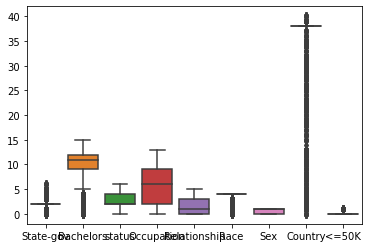

In [15]:
#box plot
data = train_data[["State-gov","Bachelors", "status", "Occupation", "Relationship", "Race", "Sex", "Country", "<=50K"]]
sns.boxplot(data=data)

<AxesSubplot:>

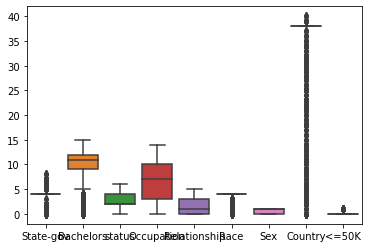

In [16]:
#box plot
data = test_data[["State-gov","Bachelors", "status", "Occupation", "Relationship", "Race", "Sex", "Country", "<=50K"]]
sns.boxplot(data=data)

In [17]:
#remove .(dots) from the last column in test dataframe
#since train_data does not have dots
#test_data["<=50K"] = test_data["<=50K"].str[:-1]

#print(test_data["<=50K"])

In [18]:
#standardize and fit training dataframe
X_train = train_data[train_data.columns[:-1]]
y_train = train_data.iloc[:, -1]

#select 15 k best features and discard informationless features.
#X_train = SelectKBest(chi2, k=12).fit_transform(X_train, y_train)

X_train = StandardScaler().fit_transform(X_train)
X_train.shape

(30161, 14)

In [19]:
#standardize and fit testing dataframe
X_test = test_data[test_data.columns[:-1]]
y_test = test_data.iloc[:, -1]

#select 15 k best features and discard informationless features.
#X_test = SelectKBest(chi2, k=12).fit_transform(X_test, y_test)

X_test = StandardScaler().fit_transform(X_test)
X_test.shape

(16281, 14)

In [20]:
#Classifiers
classifiers = []
names = []

In [21]:
#KNeighbors Classifier
knn_cl = KNeighborsClassifier()

classifiers.append(knn_cl)
names.append('KNeighbors Classifier')

In [22]:
#GaussianNB Classifier
gnb_cl = GaussianNB()

classifiers.append(gnb_cl)
names.append('GaussianNB Classifier')

In [23]:
#SVM Classifier
svm_cl = svm.SVC()

classifiers.append(svm_cl)
names.append('SVM Classifier')

In [24]:
#Decision Tree Classifier
dt_cl = DecisionTreeClassifier()

classifiers.append(dt_cl)
names.append('Decision Tree Classifier')

In [25]:
#Random Forest Classifier
rf_cl = RandomForestClassifier()

classifiers.append(rf_cl)
names.append('Random Forest Classifier')

In [26]:
#Ada Boost Classifier
ab_cl = AdaBoostClassifier()

classifiers.append(ab_cl)
names.append('Ada Boost Classifier')

In [27]:
#Gradient Boosting Classifier
gb_cl = GradientBoostingClassifier()

classifiers.append(gb_cl)
names.append('Gradient Boosting Classifier')

In [28]:
#Linear Discriminant Analysis Classifier
lda_cl = LinearDiscriminantAnalysis()

classifiers.append(lda_cl)
names.append('Linear Discriminant Analysis')

In [29]:
#MLP Classifier
mlp_cl = MLPClassifier()

classifiers.append(mlp_cl)
names.append('MLP Classifier')

In [30]:
#Logistic Regression Classifier
lr_cl = LogisticRegression()

classifiers.append(lr_cl)
names.append('Logistic Regression')

In [31]:
#ignore warnings
warnings.filterwarnings("ignore")

#evaluate each classifier
print('Starting model evaluations..')
results = [['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC', 'Exec Time']]

for i in range(len(classifiers)):
    name = names[i]
    clf = classifiers[i]
    start_time = time.time()

    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    accuracy = round(accuracy_score(y_test, y_pred), 2)
    precision = round(precision_score(y_test, y_pred), 2)
    recall = round(recall_score(y_test, y_pred), 2)
    f1 = round(f1_score(y_test, y_pred), 2)
    auc = round(roc_auc_score(y_test, y_pred), 2)
    
    end_time = time.time()
    #calculate execution time
    exec_time = round(end_time - start_time, 2)

    results.append([name, accuracy, precision, recall, f1, auc, exec_time])
    print(f'{name}: done')
    
print('Model evaluations: done')

Starting model evaluations..
KNeighbors Classifier: done
GaussianNB Classifier: done
SVM Classifier: done
Decision Tree Classifier: done
Random Forest Classifier: done
Ada Boost Classifier: done
Gradient Boosting Classifier: done
Linear Discriminant Analysis: done
MLP Classifier: done
Logistic Regression: done
Model evaluations: done


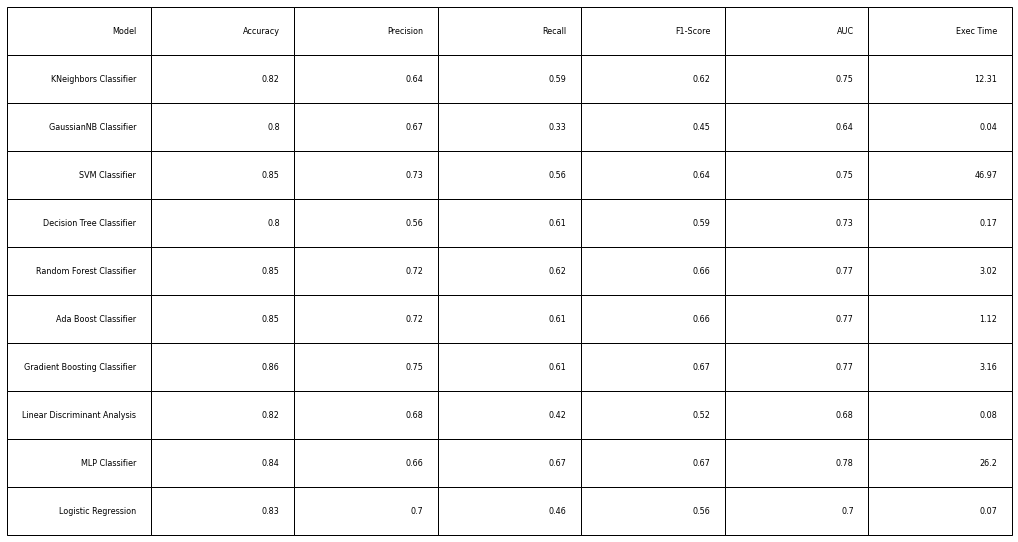

In [32]:
#result table
#https://www.statology.org/matplotlib-table/
#define figure and axes
fig, ax = plt.subplots()

#create table
table = ax.table(cellText=results, loc='center')

#modify table
table.set_fontsize(20)
table.scale(3, 4)
ax.axis('off')

#display table
plt.show()